# Titanic Death Prediction
<hr>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### Load Data

In [2]:
data = pd.read_csv('../data/train.csv')

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   ParCh            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<br>

### Check `shape` of data

In [56]:
data.shape

(891, 13)

<br>

### Check column `dtypes`

In [11]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
ParCh            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<br>

### Check for total `null` Values.

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. We will fix these in the next notebook.

<br>

---
## Part 1: Exploratory Data Analysis (EDA)
---

### Question: How many Survivors? Who were they?

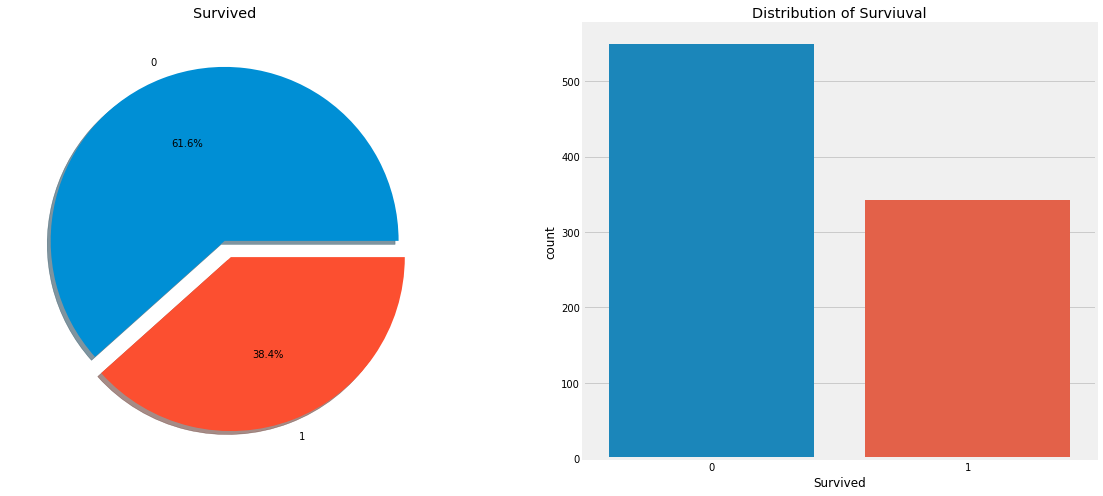

In [13]:
# Set up 2 axes to plot
f, ax = plt.subplots(1,2, figsize=(18,8))

# ax[0]
data['Survived'].value_counts().plot(kind='pie', explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')  # no need for y_label on pie chart.

## ax[1]
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Distribution of Surviuval')

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>
<hr>

## The Types of Features found in The Titanic Dataset

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: `Gender`,`Embarked`.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: `PClass`**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: `Age`**

<br>
<hr>
<br>

## Analysing The Features

## ```data['Gender']``` --> Categorical Feature

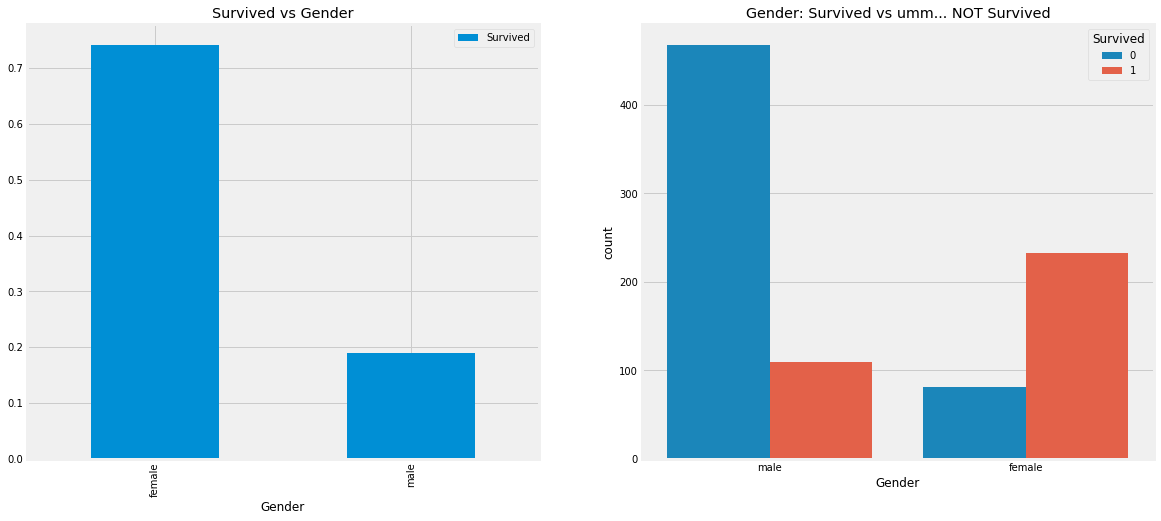

In [14]:
# Set up 2 axes to plot
f, ax = plt.subplots(1, 2, figsize= (18,8))

# ax[0]
data[['Gender','Survived']].groupby(['Gender']).mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived vs Gender')

# ax[1]
sns.countplot('Gender',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Gender: Survived vs umm... NOT Survived')

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>
<hr>
<br>

## ```data['Pclass']``` --> Ordinal Feature

In [16]:
pd.crosstab(index=data['Pclass'], columns=data['Survived'], margins = True, normalize=True).style.background_gradient(cmap='winter_r')

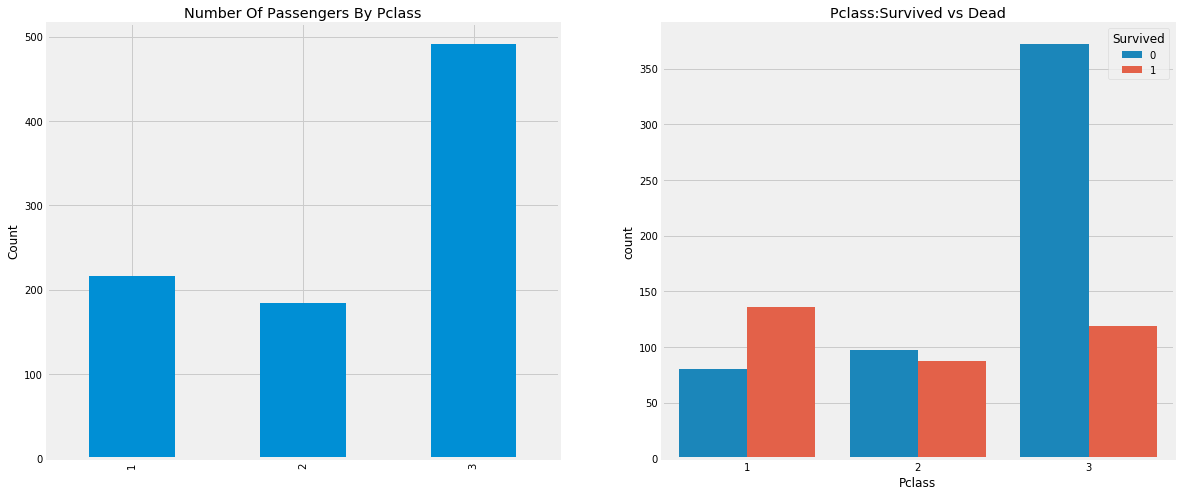

In [17]:
# Set up 2 axes
f, ax = plt.subplots(1,2,figsize=(18,8))

# ax[0]
data['Pclass'].value_counts().sort_index().plot(kind='bar', ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# ax[1]
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!




<br>
<hr>
<br>

## `data['Pclass']` & `data['Gender']`

<h3 style="color:red"> Exercise 1: </h3>

1. Create a multi-index `pd.crosstab()` that compares both `Gender` and `Survived` against `Pclass`
2. Make sure to pass in `True` for the `margins` parameter
3. For styles, add .styles.background_gradient(cmap='') to the end of your code.

4. **Possible cmap Values:** when you leave the cmap string blank aka '', python will spit back a list of all possible values! 

In [24]:
pd.crosstab(index=[data['Gender'],data['Pclass']],  columns= data['Survived'], margins = True).style.background_gradient(cmap='winter_r')

<br>
<br>

### Pointplots!
We must use `pd.catplot()` and pass `'point'` to the `kind` parameter.

Great for finding the average rate for some binary variable, in this case `survived`

1. You can add dimensions to this!
2. We can divide these approximations into the 3 `Pclass` classes along the x axis
3. Then, we can add the hue parameter to then further divide these groups by `Gender`

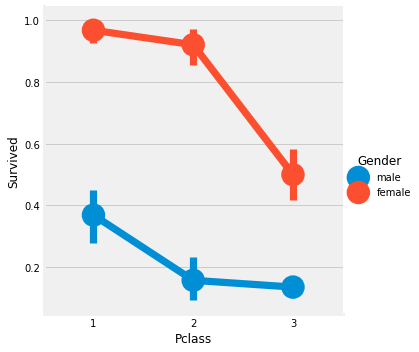

In [25]:
sns.catplot(x= 'Pclass', y= 'Survived', hue= 'Gender', data= data, kind="point")
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>
<hr>
<br>

## ```data['Age']``` --> Continous Feature


In [26]:
print('Oldest Passenger was',data['Age'].max(),'years old.')
print('Youngest Passenger was',data['Age'].min(),'years old')
print()
print('Average Age on the ship was of:', round(data['Age'].mean()),'years.')

Oldest Passenger was 80.0 years old.
Youngest Passenger was 0.42 years old

Average Age on the ship was of: 30 years.


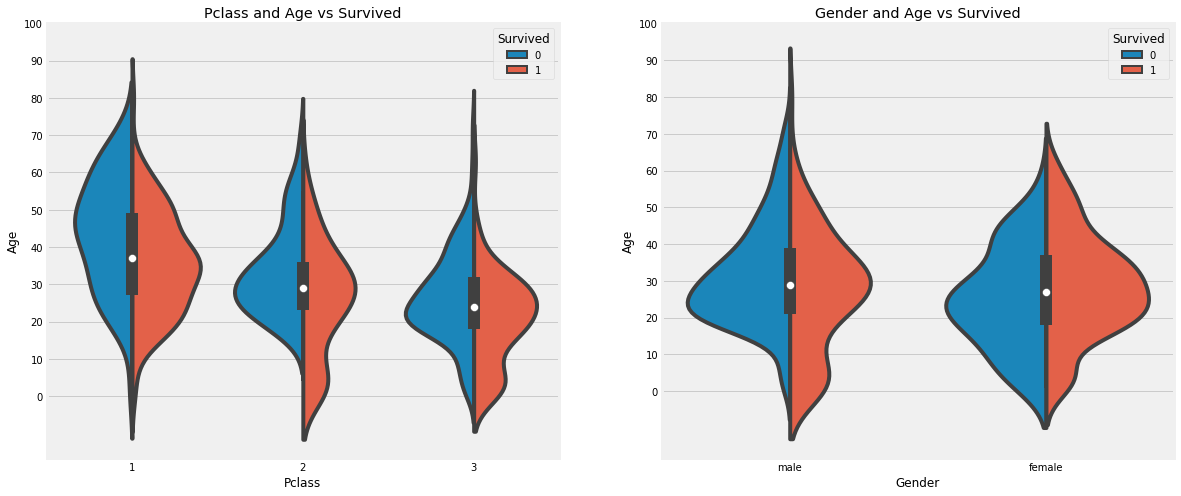

In [27]:
# Make 2 axes
f, ax = plt.subplots(1, 2, figsize = (18,8))

# ax[0] - pclass and age vs survived
sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# ax[1] - gender and age vs survived
sns.violinplot("Gender", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title('Gender and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>
<hr>
<br>

### What's In A Name? ...mild Feature Engineering

### `data['Title']`

In [29]:
data['Name'].tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [34]:
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.')

Okay so here we are using the Regex: **[A-Za-z]+)\.**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Title from the Name.

<h3 style="color:red"> Exercise 2: </h3>

1. Create a single-index `pd.crosstab()` that compares the new `Title` variable against `Gender`
2. No need for the `margins` Parameter for this one!
3. For styles, add .styles.background_gradient(cmap='') to the end of your code.
4. Notice anything interesting?

In [38]:
pd.crosstab(index=data['Title'],  columns= data['Gender']).T.style.background_gradient(cmap='winter_r')

Okay so there are some misspelled Titles like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

#### Can we get away with changing the Female `'Dr.'` into a `'Mrs.'`?

In [41]:
data.loc[(data["Title"] == "Dr") & (data["Gender"] == "female")]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Gender, Age, SibSp, ParCh, Ticket, Fare, Cabin, Embarked, Title]
Index: []

#### Change the female `'Dr'` into a `'Mrs'`

In [40]:
data.loc[(data["Title"] == "Dr") & (data["Gender"] == "female"), "Title"] = "Mrs"

#### `data['Title']` is WAY too Sparse, let's fix it.

We'll combine all Titles into 1 of 5 generic titles:
1. Miss (Madammes, Madmouselle's, etc)
2. Mrs (Ladies, Donas, etc)
3. Mr (Sirs, Dons, etc)
4. Other (Reverends, Jonkheers, etc)
5. Master (Remains untouched)

In [42]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 
                                       'Mme':'Miss', 
                                       'Ms':'Miss', 
                                       'Countess':'Mrs',
                                       'Lady':'Mrs',
                                       'Dona':'Mrs',
                                       'Capt':'Mr', 
                                       'Sir':'Mr', 
                                       'Don':'Mr',
                                       'Dr':'Mr', 
                                       'Major':'Mr',
                                       'Jonkheer':'Other', 
                                       'Col':'Other', 
                                       'Rev':'Other', })

In [57]:
data['Age'].isnull().sum()

0

<br>

### Filling NaN Ages

<h3 style="color:red"> Exercise 3: </h3>

#### Fill the rest of the `Title` groups with their avg age. 
avg_ages holds the series with each title and its corresponding avg age. You can finish this task manually, or if you want a bigger challenge, there is definitely a programmatic way of completing this task.

1. use .loc[] to fill in the avg age for each `Title`
2. (optional) do this task with a for loop.

In [44]:
avg_ages = data.groupby('Title')['Age'].mean() #lets check the average age by Title

In [45]:
avg_ages

Title
Master     4.574167
Miss      21.860000
Mr        32.699755
Mrs       36.099099
Other     45.888889
Name: Age, dtype: float64

<br>

**Use this to check your work, you know you're done when the return value is** `0`

In [47]:
data['Age'].isnull().sum()

0

#### Your work Here!
`Master` has been done for you!

In [ ]:
# Master
data.loc[(data['Age'].isnull())&(data['Title']=='Master'),'Age'] = 5


#### Optional: Replace all `NaN`s in `Age` column, for remaining `titles` with a `loop`

In [46]:
for title, avg_age in avg_ages.iteritems():
    data.loc[(data['Age'].isnull())&(data['Title'] == title), 'Age'] = round(avg_age)

<br>
<hr>

### Chances for Survival by Age

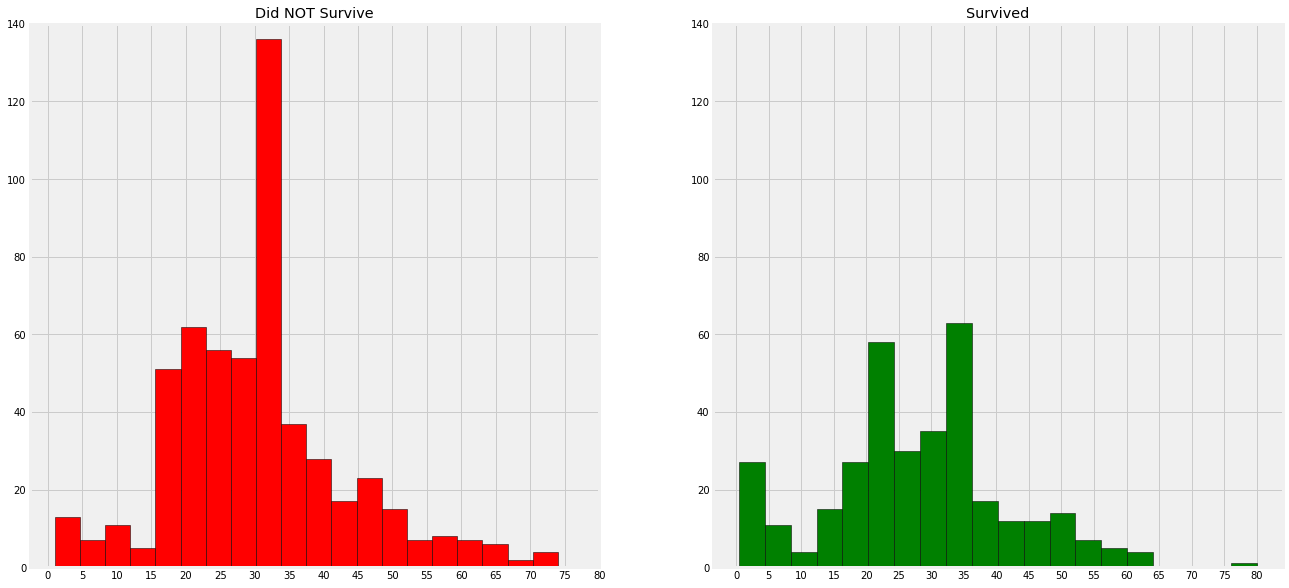

In [50]:
# Set up Figure and Axes
f, ax = plt.subplots(1, 2, figsize = (20,10))

# ax[0]
data[data['Survived'] == 0]['Age'].hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Did NOT Survive')

x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ax[0].set_ylim(0,140)

# ax[1]
data[data['Survived'] == 1]['Age'].hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived')

x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_ylim(0,140)

# Show plot
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<h3 style="color:red"> Exercise 4: </h3>

Create a Multi-Column `pointplot`, with the `sns.catplot()` function. Where each column represents a different `title`

---

`sns.catplot()` Parameters

---
1. `kind`: We want a `pointplot`, what do we pass in for that again? 
2. `data`: Pass in the var name for your titanic `dataset`.
3. `col` : We want as many side-by-side plots as unique `Title`s
4. `x`: We want each column to be further devided up by `Pclass`
5. `y`: We want to analyze the `Survived` rate for all of the above segmentations.

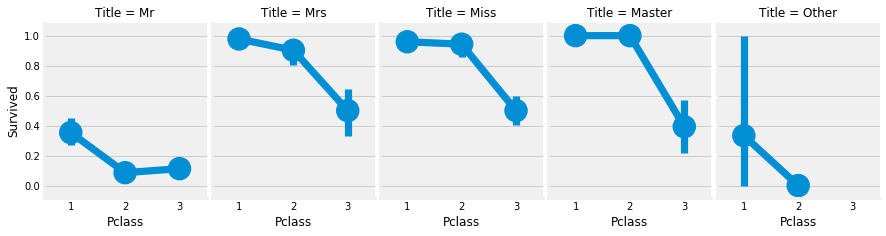

In [55]:
sns.catplot(kind = 'point', data=data, col='Title', x='Pclass', y='Survived')

fig = plt.gcf()
fig.set_size_inches(12,3)
plt.show()

<br>
<hr>
<br>

## ```data['Embarked]``` --> Categorical Value

In [62]:
data.loc[(data['Embarked']=='Q')&(data['Pclass'] == 1)]

PassengerId  Survived  Pclass                         Name  Gender   Age  \
245          246         0       1  Minahan, Dr. William Edward    male  44.0   
412          413         1       1       Minahan, Miss. Daisy E  female  33.0   

     SibSp  ParCh Ticket  Fare Cabin Embarked Title  
245      2      0  19928  90.0   C78        Q    Mr  
412      1      0  19928  90.0   C78        Q  Miss

In [58]:
pd.crosstab(index=[data['Embarked'], data['Pclass']], columns=[data['Gender'], data['Survived']], margins = True).style.background_gradient(cmap='winter_r')

### Chances for Survival by Port Of Embarkation

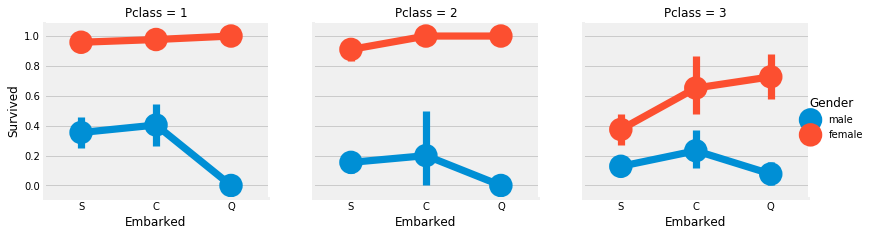

In [63]:
sns.catplot(kind='point', data = data, col='Pclass', x='Embarked', y='Survived', hue='Gender')

fig = plt.gcf()
fig.set_size_inches(12,3)
plt.subplots_adjust(wspace=0.2,hspace=0.8)
plt.show()

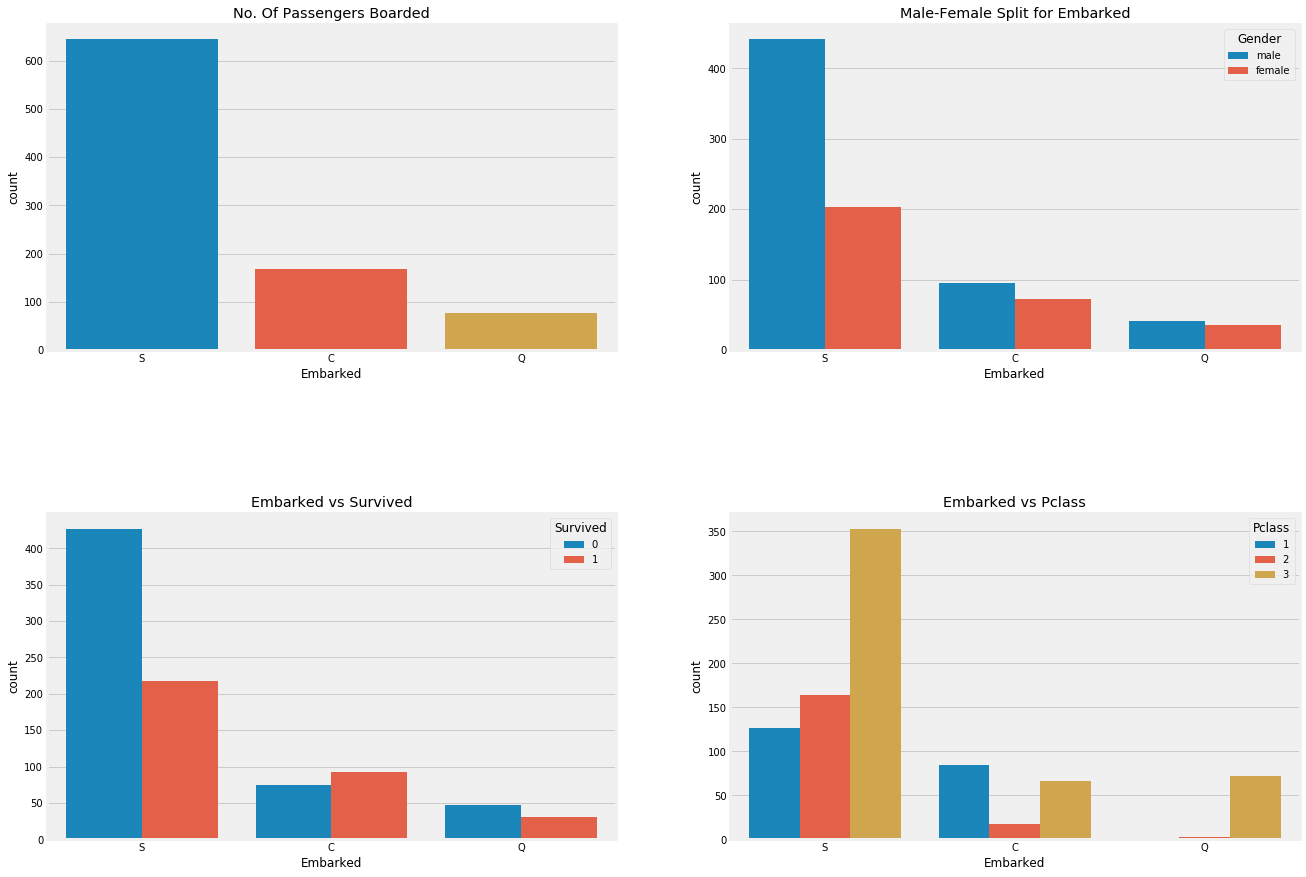

In [64]:
# set up four axes
f,ax = plt.subplots(2, 2, figsize=(20,15))

# ax[0,0]
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

# ax[0,1]
sns.countplot('Embarked',hue='Gender',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# ax[1,0]
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# ax[1,1]
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')


plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

Thoughts?

<br>

<h3 style="color:red"> Exercise 5: </h3>

1. Create a multi-column pointplot with the `kind`=`'point'` parameter in `sns.catplot()`
2. Compares `Pclass` to `Survived` in the x vs y axes 
3. Define the columns aka `col` with the `Embarked` variable.
4. Lastly, Add a `hue` to differentiate by `Gender`

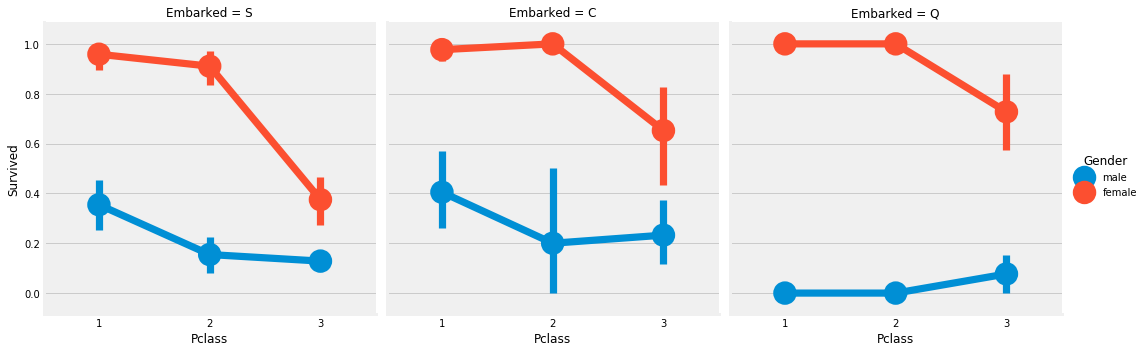

In [65]:
sns.catplot(kind='point', x='Pclass', y='Survived', col='Embarked', hue='Gender', data=data)

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

### Embarked: Filling NaN values

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [69]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [67]:
data['Embarked'] = data['Embarked'].fillna('S')

In [68]:
data['Embarked'].isnull().sum() # Finally No NaN values

0

<br>

## ```data['SibSp']``` --> Discrete Feature
**This feature represents whether a person is alone or with family members.**

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife 

In [70]:
pd.crosstab(data['SibSp'], data['Survived'], margins=True, normalize=True).style.background_gradient(cmap='winter_r')

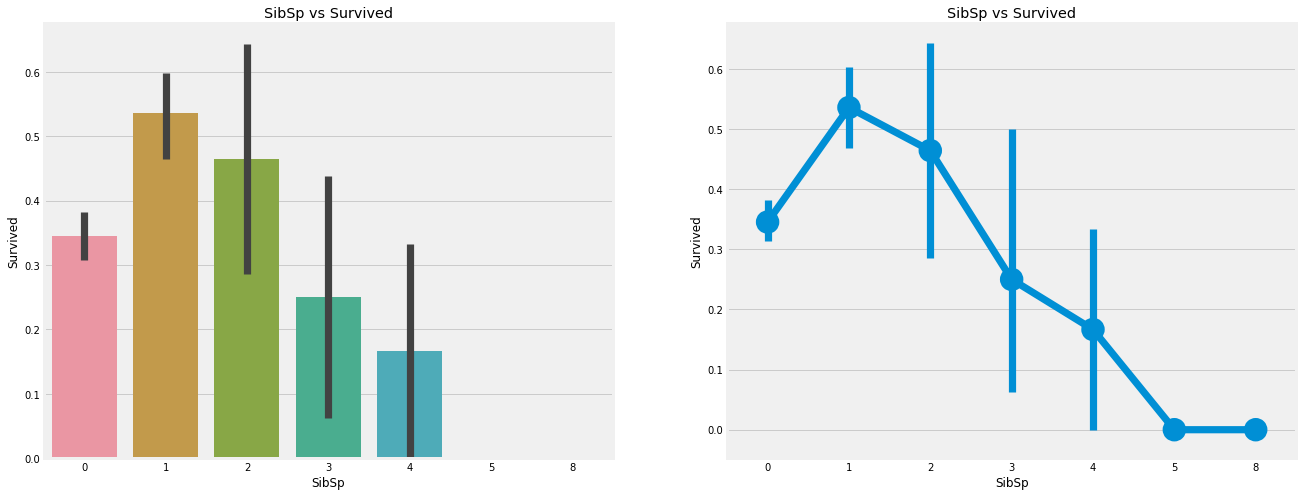

In [71]:
# set up 2 axes
f , ax = plt.subplots(1, 2 , figsize = (20,8))

# ax[0]
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

# ax[1]
sns.catplot(x='SibSp', y='Survived', kind='point', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [75]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='winter_r')

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

## ```data['ParCh']``` --> Discrete Feature

In [76]:
pd.crosstab(data['ParCh'],data['Pclass']).style.background_gradient(cmap='winter_r')

The crosstab again shows that larger families were in Pclass3.

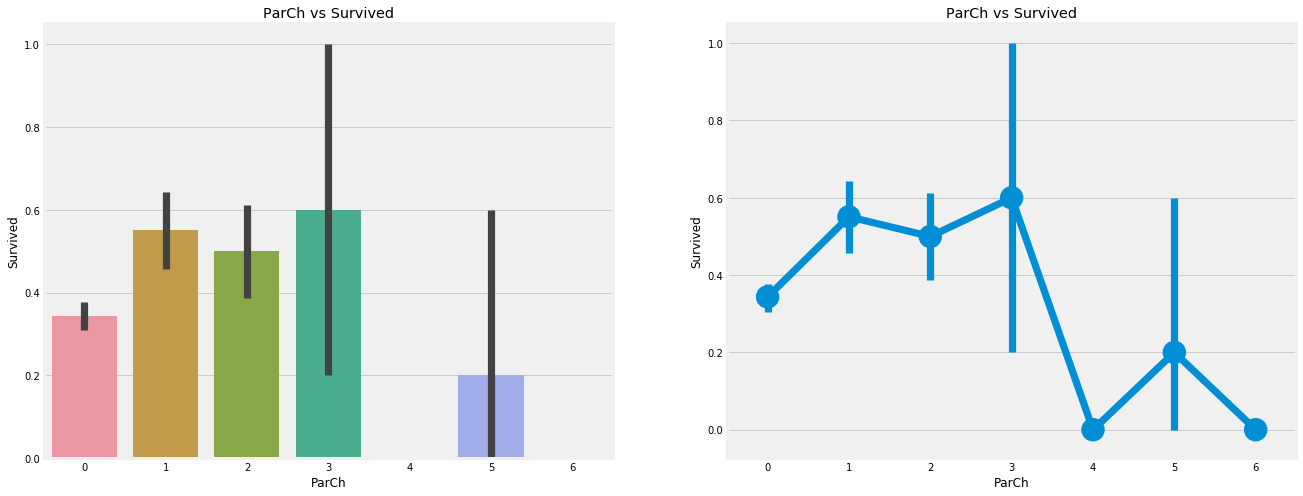

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('ParCh','Survived',data=data,ax=ax[0])
ax[0].set_title('ParCh vs Survived')

sns.catplot('ParCh','Survived',kind='point', data=data,ax=ax[1])
ax[1].set_title('ParCh vs Survived')

plt.close(2)
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

## ```data['Fare']``` --> Continous Feature

In [78]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0**. Wow!! a free luxorious ride. 

<br>

<h3 style="color:red"> Exercise 6: </h3>

#### Question: What was the survival rate for those who got a "free" ride...?

In [ ]:
# Survival rate for free loaders?

# Oh...

<br>

In [ ]:
# Set 4 axes
f,ax=plt.subplots(2,2,figsize=(15,15))

# ax[0,0]
sns.distplot(data[data['Pclass']==1]['Fare'],ax=ax[0][0])
ax[0][0].set_title('Fares in Pclass 1')
# ax[0][0].set_xlim(-50,500)

# ax[0,1]
sns.distplot(data[data['Pclass']==2]['Fare'],ax=ax[0][1])
ax[0][1].set_title('Fares in Pclass 2')
# ax[0][1].set_xlim(-50,500)

# ax[1,0]
sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[1][0])
ax[1][0].set_title('Fares in Pclass 3')
# ax[1][0].set_xlim(-50,500)

plt.show()

<br>

## Final Observations for each Feature:
**Gender:** 
Females have higher chance of survival
Gender is a good measure, but should be in tandem with PClass

**Pclass:** 
Pclass 1 and 2 were strong indicators of survival, mostly for Female
Not quite as pronouncd for males but still a good indicator.

**Age:** 
A lot of 30-35 yr olds survived but a larger amount also persished
15-20 had a higher rate
0-10 had a good survival rate

**Embarked:** 
Lower chance of survival in port S, ecause most are from pclass 3.
Same for survival in port Q, because most are from pclass 3 .


**Parch+SibSp:** Groups of 2 had largest survival, groups smaller or larger suffered.

<br>

## Correlation Between The Features

In [ ]:
sns.set_style("whitegrid")

correlations = data.corr()
correlations = correlations * 100

bool_mask = np.zeros_like(correlations, dtype=np.bool)
bool_mask[np.triu_indices_from(bool_mask)] = True

sns.heatmap(correlations, annot=True, fmt='.0f', cmap = 'RdYlGn', mask=bool_mask)
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

### Let's Verify that we've cleaned our dataset accordingly!

In [ ]:
data.isnull().sum()

<br>

## Save your cleaned dataset!

In [ ]:
data.to_csv("../data/clean/titanic_cleaned.csv", index=None)